In [10]:
#importing libraries
from sklearn import model_selection
from sklearn.datasets import load_iris

import numpy as np
import matplotlib.pyplot as plt

# Load data from scikit-learn dataset
iris = load_iris()
print("Number of entries in Iris Dataset: ", len(iris.data))
X = iris.data
y = iris.target



Number of entries in Iris Dataset:  150


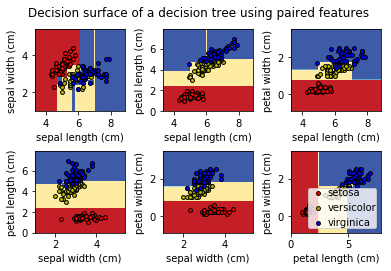

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Parameters for Iris Dataset Visualiation
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

#visualizing Iris DataSet with taking pairs to develop Decision Tree
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [12]:
# Reloading data from scikit-learn dataset, however this time not in pairs
iris = load_iris()
print("Number of entries in Iris Dataset: ", len(iris.data))
X = iris.data
y = iris.target


Number of entries in Iris Dataset:  150


In [23]:
#bagging
from sklearn.ensemble import BaggingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=6, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 10
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X,y, cv=kfold)
print("Accuracy of models in individual folds:",results)
print("Mean accuracy of Bagging with 10 tress and 6 kFold:",results.mean())

Accuracy of models in individual folds: [1.   1.   0.88 0.92 0.92 0.84]
Mean accuracy of Bagging with 10 tress and 6 kFold: 0.9266666666666666


In [26]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

seed=7
kfold = model_selection.KFold(n_splits=6, random_state=seed)
max_features=3
num_trees=100

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy of models in individual folds:",results)
print("Mean accuracy of RandomForest with 100 trees, 6 KFolds and 3 Features:",results.mean())

Accuracy of models in individual folds: [1.   1.   0.92 0.92 0.92 0.84]
Mean accuracy of RandomForest with 100 trees, 6 KFolds and 3 Features: 0.9333333333333332


In [31]:
#Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

seed = 7
kfold = model_selection.KFold(n_splits=6, random_state=seed)
max_features = 3
num_trees=100
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy of models in individual folds:",results)
print("Mean accuracy of Extra Trees with 100 trees and 6 kFold:",results.mean())

Accuracy of models in individual folds: [1.   1.   0.92 0.92 0.92 0.88]
Mean accuracy of Extra Trees with 100 trees and 6 kFold: 0.94


In [36]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=6, random_state=seed)
num_trees=30
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy of models in individual folds:",results)
print("Mean accuracy of  Gradient Boosting with 30 trees and 6 kFold:",results.mean())

Accuracy of models in individual folds: [1.   1.   0.88 0.92 0.92 0.84]
Mean accuracy of  Gradient Boosting with 30 trees and 6 kFold: 0.9266666666666666


In [37]:
#Ada-boosting
from sklearn.ensemble import AdaBoostClassifier

seed = 7
kfold = model_selection.KFold(n_splits=6, random_state=seed)
num_trees=30
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy of models in individual folds:",results)
print("Mean accuracy of  Ada Boosting with 30 trees and 6 kFold:",results.mean())

Accuracy of models in individual folds: [1.   1.   0.96 0.92 0.92 0.88]
Mean accuracy of  Ada Boosting with 30 trees and 6 kFold: 0.9466666666666667


In [41]:
#Voting Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

seed = 7
kfold = model_selection.KFold(n_splits=6, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print("Accuracy of models in individual folds:",results)
print("Mean accuracy of  Ensemble Vorting with 6 kFold:",results.mean())

Accuracy of models in individual folds: [1.   1.   0.92 0.92 0.88 0.76]
Mean accuracy of  Ensemble Vorting with 6 kFold: 0.9133333333333332


/Users/babu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/babu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/babu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/babu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig